# Question 2 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

# Part A (single scattering)

<img src="diagram.png" width=500 height=500>

The angle of incidence has to be equal to the angle of reflection. Using this principle around the perpendicular plane that connects to the origin, we find that we can construct both a triagnle for $\beta$ and a relationship between $\beta$ and $\theta$ along the perpendicular line. Rearranging and substituting the second equation into the first, we find:
\begin{equation}
\beta = \arcsin{z}
\end{equation}

\begin{equation}
\theta = \pi - 2 \arcsin{z}
\end{equation}

We now write a python script to convert between $z$ and $\theta$ using the equation above:

In [2]:
#import modules
import numpy as np # import numpy
from math import pi # import pi

# Define Function
def findtheta(z):
    return pi-2*np.arcsin(z) # given z, return theta in radians

Now test our function with a given value of $z = 0.25$

In [3]:
print(findtheta(0.25))

# also print result in degrees
print(findtheta(0.25) *180/pi)

2.63623214331
151.044975628


This value makes sense, it is smaller than $\pi$ or 180, which indicates that the particle scatters behind the cylinder

# Part B (multiple scatterings pseudocode)

1. Generate an array of random numbers from -1 to 1 ($z$ values)

2. Convert random $z$ values array to scattered $\theta$ values

3. Create histogram of random z values to ensure uniform distribution

4. Create histogram of scattered $\theta$ values to find resulting distrubution

5. Calculate the percentage of scattered particles within $175 < \theta <185$ and $20 < \theta <30$ ranges
    1. Find number of particles in desired range
    2. Divide by total number of particles
    3. Divide first calculation of $175 < \theta <185$ range by second calculation of $20 < \theta <30$ range to get relative probablility 

# Part C (multiple scatterings)

In [4]:
#import additional modules
from numpy.random import random # random number generator
import matplotlib.pyplot as plt # plot functions (including histogram)

>1\. Generate an array of random numbers from -1 to 1 ($z$ values)

In [5]:
zvalues = -1+random(1000000)*2.0 # create array of 1,000,000 numbers in range 0-2, then shift to -1 to 1

>2\. Convert random $z$ values array to scattered $\theta$ values

In [6]:
# Use previously defined function findtheta
# However, convert to degrees as well as we did before (findtheta outputs radians)
thetavalues = findtheta(zvalues) *180/pi

>3\. Create histogram of random z values to ensure uniform distribution

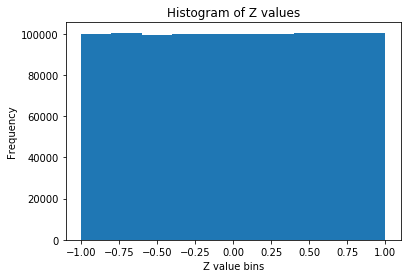

In [8]:
plt.hist(zvalues) # creates histogram of z values using default values of bins (does not matter too much here)
plt.xlabel('Z value bins')
plt.ylabel('Frequency')
plt.title('Histogram of Z values')
plt.show()

Our z values are clearly uniformly distributed, there is nothing to worry about here

>4\. Create histogram of scattered $\theta$ values to find resulting distrubution

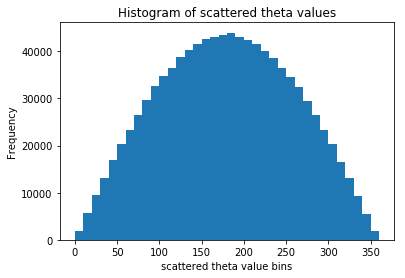

In [9]:
b=np.arange(0,370,10) # create array to indicate bins of size 10 degrees from 0-10 to 350-360
n,bins,p = plt.hist(thetavalues,bins=b) # create histogram of thetavalues using bins created above
plt.xlabel('scattered theta value bins')
plt.ylabel('Frequency')
plt.title('Histogram of scattered theta values')
plt.show()

We find that the distribution in $\theta$ is no longer uniform. This makes sense as the cylinder is not a flat surface, and reflects at steeper angles the higher $z$ is. Because the curvature changes only slightly near $z=0$, the reflection angle $\theta$ do not change much for low $z$. But for large $z$, the curvature changes rapidly, and so the reflection angle $\theta$ also changes rapidly, meaning lower probabilities for $\theta$ in this range.

>5\. Calculate the percentage of scattered particles within $170 < \theta <190$ and $90 < \theta <110$ ranges

In [10]:
# calculate sum of values between 170-190
q=n[17:19] # make a slice of total bins to only keep bins 170-180 and 180-190
total1=np.sum(q) # sum amount of particles in both bins

# calculate sum of values between 90-110
m=n[9:11] # make a slice of total bins to only keep bins 90-100 and 100-110
total2=np.sum(m) # sum amount of particles in both bins

#calculate the probabilities
pq=total1/(np.sum(n)) # probability of value between 170-190 
pm=total2/(np.sum(n)) # probability of value between 90-110

print('Probability of value between 170-190:',pq*100,'%')
print('Probability of value between 90-110:',pm*100,'%')
print('Relative Probability:',pq/pm*100,'%') # Print Relative probability by dividing th previous two

Probability of value between 170-190: 8.7426 %
Probability of value between 90-110: 6.7448 %
Relative Probability: 129.619855296 %


Check these numbers again for double the number of particles (run through code again with 2*z):

Probability of value between 170-190: 8.722 %
Probability of value between 90-110: 6.69065 %
Relative Probability: 130.361026208 %


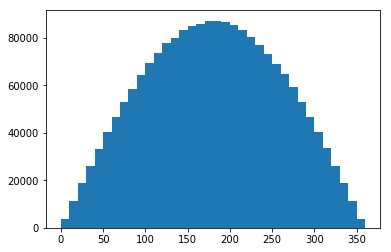

In [11]:
z2values = -1+random(2000000)*2.0 # create array of 2,000,000 numbers in range 0-2, then shift to -1 to 1

# Use previously defined function findtheta
# However, convert to degrees as well as we did before (findtheta outputs radians)
thetavalues2 = findtheta(z2values) *180/pi

n2,bins2,p2 = plt.hist(thetavalues2,bins=b) # create histogram of thetavalues2 using same bins created before

# calculate sum of values between 170-190
q2=n2[17:19] # make a slice of total bins to only keep bins 170-180 and 180-190
total12=np.sum(q2) # sum amount of particles in both bins

# calculate sum of values between 90-110
m2=n2[9:11] # make a slice of total bins to only keep bins 90-100 and 100-110
total22=np.sum(m2) # sum amount of particles in both bins

#calculate the probabilities
pq2=total12/(np.sum(n2)) # probability of value between 170-190 
pm2=total22/(np.sum(n2)) # probability of value between 90-110

print('Probability of value between 170-190:',pq2*100,'%')
print('Probability of value between 90-110:',pm2*100,'%')
print('Relative Probability:',pq2/pm2*100,'%') # Print Relative probability by dividing th previous two

The probability values stay almost the exact same, and the histogram looks identical. We therefore confirm the validity of our simulation.